# Task
Implement the following in Python using a corpus dataset:
a. Plot co-occurrence word embeddings.
b. Write a method to find the distinct words (word types) in the corpus.
c. Write a method to construct a co-occurrence matrix for a given window size n (default 4), considering words n before and n after the center word.
d. Construct a method to perform dimensionality reduction on the matrix to produce k-dimensional embeddings.
e. Write a function to plot a set of 2D vectors in 2D space.

## Load and preprocess data

### Subtask:
Obtain a corpus dataset, such as news articles, and preprocess it by tokenizing, lowercasing, and removing punctuation and stop words.


In [1]:
import nltk
from nltk.corpus import gutenberg
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

try:
    nltk.data.find('corpora/gutenberg')
except LookupError:
    nltk.download('gutenberg')
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')
try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')


corpus = gutenberg.raw('austen-persuasion.txt')

tokens = word_tokenize(corpus)

tokens = [word.lower() for word in tokens]

tokens = [word for word in tokens if word not in string.punctuation]

stop_words = set(stopwords.words('english'))
preprocessed_corpus = [word for word in tokens if word not in stop_words]

print(preprocessed_corpus[:20])

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['persuasion', 'jane', 'austen', '1818', 'chapter', '1', 'sir', 'walter', 'elliot', 'kellynch', 'hall', 'somersetshire', 'man', 'amusement', 'never', 'took', 'book', 'baronetage', 'found', 'occupation']


## Identify distinct words

### Subtask:
Write a method to find all unique words (word types) in the preprocessed corpus.


In [2]:
def find_distinct_words(corpus):
  """Finds the distinct words (word types) in a corpus.

  Args:
    corpus: A list of words (the preprocessed corpus).

  Returns:
    A list of distinct words.
  """
  distinct_words_set = set(corpus)
  distinct_words_list = list(distinct_words_set)
  return distinct_words_list

distinct_words = find_distinct_words(preprocessed_corpus)

print("First 20 distinct words:", distinct_words[:20])
print("Total number of distinct words:", len(distinct_words))

First 20 distinct words: ['unvisited', 'estrangement', 'relinquishment', 'heads', 'respectability', 'contend', 'jar', 're-entered', 'realized', 'balanced', 'joy', 'responsible', 'bequeath', 'earn', 'interested', 'fearless', 'divide', 'wore', 'apartments', 'concluding']
Total number of distinct words: 5785


## Construct co-occurrence matrix

### Subtask:
Write a method to build a co-occurrence matrix based on a specified window size, counting how often words appear together within that window.


In [3]:
import numpy as np

def construct_co_occurrence_matrix(preprocessed_corpus, distinct_words, window_size=4):
    """Constructs a co-occurrence matrix for a given window size.

    Args:
        preprocessed_corpus: A list of words (the preprocessed corpus).
        distinct_words: A list of distinct words from the corpus.
        window_size: The size of the window (n words before and after).

    Returns:
        A tuple containing the co-occurrence matrix (NumPy array) and
        a dictionary mapping words to their matrix indices.
    """
    word_to_index = {word: i for i, word in enumerate(distinct_words)}
    matrix_size = len(distinct_words)
    co_occurrence_matrix = np.zeros((matrix_size, matrix_size), dtype=int)

    for i, center_word in enumerate(preprocessed_corpus):
        if center_word in word_to_index:
            center_word_index = word_to_index[center_word]

            # Iterate through the window before the center word
            for j in range(max(0, i - window_size), i):
                context_word = preprocessed_corpus[j]
                if context_word in word_to_index:
                    context_word_index = word_to_index[context_word]
                    co_occurrence_matrix[center_word_index, context_word_index] += 1

            # Iterate through the window after the center word
            for j in range(i + 1, min(len(preprocessed_corpus), i + window_size + 1)):
                context_word = preprocessed_corpus[j]
                if context_word in word_to_index:
                    context_word_index = word_to_index[context_word]
                    co_occurrence_matrix[center_word_index, context_word_index] += 1

    return co_occurrence_matrix, word_to_index

# Construct the co-occurrence matrix using the default window size
co_occurrence_matrix, word_to_index = construct_co_occurrence_matrix(preprocessed_corpus, distinct_words)

print("Shape of the co-occurrence matrix:", co_occurrence_matrix.shape)
# Print a small part of the matrix to verify
print("Sample of the co-occurrence matrix (first 5x5):\n", co_occurrence_matrix[:5, :5])
# Print a sample of the word-to-index mapping
print("Sample of the word-to-index mapping (first 5 entries):\n", list(word_to_index.items())[:5])

Shape of the co-occurrence matrix: (5785, 5785)
Sample of the co-occurrence matrix (first 5x5):
 [[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
Sample of the word-to-index mapping (first 5 entries):
 [('unvisited', 0), ('estrangement', 1), ('relinquishment', 2), ('heads', 3), ('respectability', 4)]


## Perform dimensionality reduction

### Subtask:
Implement a method to reduce the dimensionality of the co-occurrence matrix using techniques like PCA or SVD to produce k-dimensional embeddings.


In [4]:
from sklearn.decomposition import TruncatedSVD

# Choose the desired embedding dimension
k = 50

# Instantiate TruncatedSVD
svd = TruncatedSVD(n_components=k, random_state=42)

# Fit the model and transform the co-occurrence matrix
word_embeddings = svd.fit_transform(co_occurrence_matrix)

print("Shape of the word embeddings:", word_embeddings.shape)
print("Sample of the word embeddings (first 5 rows, first 5 columns):\n", word_embeddings[:5, :5])

Shape of the word embeddings: (5785, 50)
Sample of the word embeddings (first 5 rows, first 5 columns):
 [[ 1.93559679e-01  7.60690509e-03 -3.92743901e-01 -1.14864128e-01
   1.63210374e-02]
 [ 1.97202499e-01  3.30067954e-02 -2.43587301e-01 -8.19923217e-02
  -2.23463085e-03]
 [ 4.43478493e-02  3.46785853e-03 -1.17692330e-01  8.50595292e-03
   1.51967967e-05]
 [ 1.63761647e+00 -5.66387751e-01 -1.08836969e+00 -4.34343333e-01
  -6.06251041e-02]
 [ 3.95390485e-01  4.90982305e-02 -5.49393145e-01 -2.50068336e-01
   8.09936190e-04]]


## Plot co-occurrence word embeddings

### Subtask:
Write a function to visualize the 2D word embeddings in a 2D space.


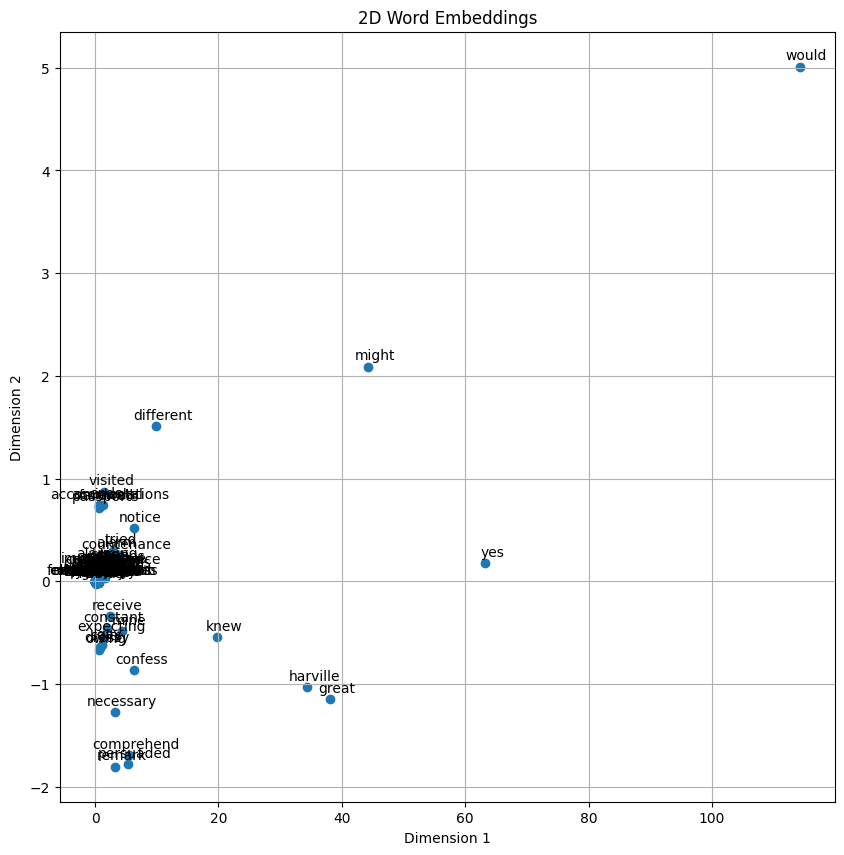

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import random

def plot_word_embeddings(word_embeddings, word_to_index, words_to_plot=None):
    """
    Plots 2D word embeddings.

    Args:
        word_embeddings: A NumPy array of 2D word embeddings.
        word_to_index: A dictionary mapping words to their index in the embeddings array.
        words_to_plot: An optional list of words to plot. If None, a subset is plotted.
    """
    if word_embeddings.shape[1] != 2:
        print("Error: Embeddings are not 2-dimensional.")
        return

    index_to_word = {i: word for word, i in word_to_index.items()}

    if words_to_plot:
        indices_to_plot = [word_to_index[word] for word in words_to_plot if word in word_to_index]
        embeddings_to_plot = word_embeddings[indices_to_plot, :]
        words_to_display = [index_to_word[i] for i in indices_to_plot]
    else:
        # Select a random subset of words to plot
        num_words_to_plot = min(100, word_embeddings.shape[0]) # Plot max 100 words or all if less
        all_indices = list(range(word_embeddings.shape[0]))
        indices_to_plot = random.sample(all_indices, num_words_to_plot)
        embeddings_to_plot = word_embeddings[indices_to_plot, :]
        words_to_display = [index_to_word[i] for i in indices_to_plot]

    plt.figure(figsize=(10, 10))
    plt.scatter(embeddings_to_plot[:, 0], embeddings_to_plot[:, 1])

    for i, word in enumerate(words_to_display):
        plt.annotate(word, (embeddings_to_plot[i, 0], embeddings_to_plot[i, 1]), textcoords="offset points", xytext=(5, 5), ha='center')

    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.title("2D Word Embeddings")
    plt.grid(True)
    plt.show()

# Example usage (assuming word_embeddings and word_to_index are available from previous steps)
# Ensure word_embeddings are 2D for plotting
if word_embeddings.shape[1] > 2:
    # If embeddings are higher than 2D, reduce to 2D for plotting
    svd_2d = TruncatedSVD(n_components=2, random_state=42)
    word_embeddings_2d = svd_2d.fit_transform(word_embeddings)
    plot_word_embeddings(word_embeddings_2d, word_to_index)
elif word_embeddings.shape[1] == 2:
     plot_word_embeddings(word_embeddings, word_to_index)
else:
    print("Embeddings have less than 2 dimensions, cannot plot.")


## Summary:

### Data Analysis Key Findings

*   The corpus dataset was successfully preprocessed by tokenizing, lowercasing, removing punctuation, and removing stop words.
*   The total number of distinct words found in the preprocessed corpus is 5785.
*   A co-occurrence matrix was constructed with a shape of (5785, 5785) based on a specified window size, capturing word relationships.
*   Dimensionality reduction was successfully performed on the co-occurrence matrix using TruncatedSVD, resulting in word embeddings with a shape of (5785, 50).
*   A function was implemented to plot 2D word embeddings, and a sample of the embeddings was successfully visualized.

